In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import SVG, HTML

import pygal

html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

In [2]:
jt2016 = pd.read_csv('rround-2016.txt', sep=';', low_memory=False, encoding='latin-1')
jt2017 = pd.read_csv('rround-2017.txt', sep=';', low_memory=False, encoding='latin-1')

field2017 = jt2017.loc[(jt2017['Player Name'] != 'Thomas, Justin')]
jt2017 = jt2017.loc[(jt2017['Player Name'] == 'Thomas, Justin')]
jt2016 = jt2016.loc[(jt2016['Player Name'] == 'Thomas, Justin')]

jt = pd.concat([jt2016, jt2017])
jt = jt[(jt["Round Score"] >= 58)]

jt.fillna(0)
field2017.fillna(0)

,Tour,Tournament Year,Tournament #,Permanent Tournament #,Course #,Team ID,Team Number,Player Number,Player Name,Round Number,...,Putting > 10' (putts made),Putting > 10' (attempts),Putting > 10' (rank),Total Putts Gained,Total SG T2G,Total SG Total,OTT SG Avg.,APP SG Avg.,ARG SG Avg.,Unnamed: 178
0,R,2017,10,464,552,,0,1810,"Mickelson, Phil",1,...,1.0,9.0,93.0,.510-,2.573,2.063,.368-,2.150,.790,0.0
1,R,2017,10,464,552,,0,2206,"Toms, David",1,...,3.0,11.0,24.0,1.945,4.884-,2.938-,.325-,3.588-,.969-,0.0
2,R,2017,10,464,552,,0,12510,"Campbell, Chad",1,...,0.0,8.0,127.0,1.357-,2.420,1.063,.432-,1.957,.894,0.0
3,R,2017,10,464,552,,0,12716,"Hoffman, Charley",1,...,4.0,14.0,18.0,2.784,.722-,2.063,1.542,.961-,1.303-,0.0
4,R,2017,10,464,552,,0,19803,"Armour, Ryan",1,...,4.0,15.0,31.0,2.062,3.001-,.938-,1.306-,1.668-,.025-,0.0
5,R,2017,10,464,552,,0,20104,"Duke, Ken",1,...,2.0,12.0,70.0,.702-,2.765,2.063,.284-,2.078,.970,0.0
6,R,2017,10,464,552,,0,20157,"Goosen, Retief",1,...,1.0,14.0,123.0,1.494-,1.557,.063,.450,.160,.945,0.0
7,R,2017,10,464,552,,0,20229,"Cink, Stewart",1,...,1.0,9.0,93.0,.207,1.146-,.938-,.019,2.331-,1.166,0.0
8,R,2017,10,464,552,,0,20572,"Pampling, Rod",1,...,3.0,13.0,37.0,.021,.960-,.938-,1.197-,.711,.473-,0.0
9,R,2017,10,464,552,,0,20593,"Chalmers, Greg",1,...,2.0,11.0,61.0,1.634,1.572-,.063,1.258-,1.419-,1.105,0.0


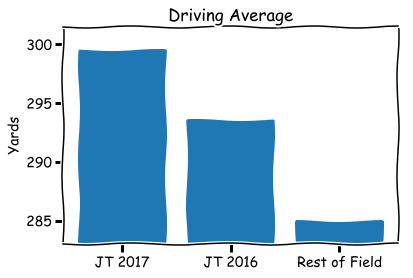

In [10]:
jt['Driving Average'] = jt['Driving Dist. - All Drives(Tot. Dist.)'] / jt['Driving Dist. - All Drives(# of Drives)']
field2017['Driving Average'] = field2017['Driving Dist. - All Drives(Tot. Dist.)'] / field2017['Driving Dist. - All Drives(# of Drives)']

labels = ('JT 2017', 'JT 2016', 'Rest of Field')
y = np.arange(len(labels))
data = (
    jt.loc[(jt['Tournament Year'] == 2017)]['Driving Average'].mean(),
    jt.loc[(jt['Tournament Year'] == 2016)]['Driving Average'].mean(),
    field2017['Driving Average'].mean()
)
with plt.xkcd():
    plt.bar(y, data, align='center')
    plt.xticks(y, labels)
    plt.ylabel('Yards')
    plt.ylim([min(data)-2.0, max(data)+2.0])
    plt.title('Driving Average')
    plt.savefig('driving-average.png')
    plt.show()

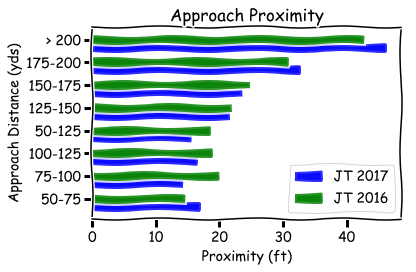

In [21]:
jt['Approach 50-75 Average'] = jt['App. 50-75 yds(ft)'] / jt['App. 50-75 yds(attempts)']
jt['Approach 75-100 Average'] = jt['App. 75-100 yds(ft)'] / jt['App. 75-100 yds(attempts)']
jt['Approach 100-125 Average'] = jt['App. 100-125 yds(ft)'] / jt['App. 100-125 yds(attempts)']
jt['Approach 50-125 Average'] = jt['Approaches 50-125 Yards(ft)'] / jt['Approaches 50-125 Yards(attempts)']
jt['Approach 125-150 Average'] = jt['Approaches 125-150 Yards(ft)'] / jt['Approaches 125-150 Yards(attempts)']
jt['Approach 150-175 Average'] = jt['Approaches 150-175 Yards(ft)'] / jt['Approaches 150-175 Yards(attempts)']
jt['Approach 175-200 Average'] = jt['Approaches 175-200 Yards(ft)'] / jt['Approaches   175-200 Yards(attempts)']
jt['Approach >200 Average'] = jt['Approaches >200 Yards(ft)'] / jt['Approaches >200 Yards(attempts)']

field2017['Approach 50-75 Average'] = field2017['App. 50-75 yds(ft)'] / field2017['App. 50-75 yds(attempts)']
field2017['Approach 75-100 Average'] = field2017['App. 75-100 yds(ft)'] / field2017['App. 75-100 yds(attempts)']
field2017['Approach 100-125 Average'] = field2017['App. 100-125 yds(ft)'] / field2017['App. 100-125 yds(attempts)']
field2017['Approach 50-125 Average'] = field2017['Approaches 50-125 Yards(ft)'] / field2017['Approaches 50-125 Yards(attempts)']
field2017['Approach 125-150 Average'] = field2017['Approaches 125-150 Yards(ft)'] / field2017['Approaches 125-150 Yards(attempts)']
field2017['Approach 150-175 Average'] = field2017['Approaches 150-175 Yards(ft)'] / field2017['Approaches 150-175 Yards(attempts)']
field2017['Approach 175-200 Average'] = field2017['Approaches 175-200 Yards(ft)'] / field2017['Approaches   175-200 Yards(attempts)']
field2017['Approach >200 Average'] = field2017['Approaches >200 Yards(ft)'] / field2017['Approaches >200 Yards(attempts)']

index = np.arange(8)
seriesJT2017 = (
    jt.loc[(jt['Tournament Year'] == 2017)]['Approach 50-75 Average'].mean(),
    jt.loc[(jt['Tournament Year'] == 2017)]['Approach 75-100 Average'].mean(),
    jt.loc[(jt['Tournament Year'] == 2017)]['Approach 100-125 Average'].mean(),
    jt.loc[(jt['Tournament Year'] == 2017)]['Approach 50-125 Average'].mean(),
    jt.loc[(jt['Tournament Year'] == 2017)]['Approach 125-150 Average'].mean(),
    jt.loc[(jt['Tournament Year'] == 2017)]['Approach 150-175 Average'].mean(),
    jt.loc[(jt['Tournament Year'] == 2017)]['Approach 175-200 Average'].mean(),
    jt.loc[(jt['Tournament Year'] == 2017)]['Approach >200 Average'].mean()
)

seriesJT2016 = (
    jt.loc[(jt['Tournament Year'] == 2016)]['Approach 50-75 Average'].mean(),
    jt.loc[(jt['Tournament Year'] == 2016)]['Approach 75-100 Average'].mean(),
    jt.loc[(jt['Tournament Year'] == 2016)]['Approach 100-125 Average'].mean(),
    jt.loc[(jt['Tournament Year'] == 2016)]['Approach 50-125 Average'].mean(),
    jt.loc[(jt['Tournament Year'] == 2016)]['Approach 125-150 Average'].mean(),
    jt.loc[(jt['Tournament Year'] == 2016)]['Approach 150-175 Average'].mean(),
    jt.loc[(jt['Tournament Year'] == 2016)]['Approach 175-200 Average'].mean(),
    jt.loc[(jt['Tournament Year'] == 2016)]['Approach >200 Average'].mean()
)

seriesField2017 = (
    field2017['Approach 50-75 Average'].mean(),
    field2017['Approach 75-100 Average'].mean(),
    field2017['Approach 100-125 Average'].mean(),
    field2017['Approach 50-125 Average'].mean(),
    field2017['Approach 125-150 Average'].mean(),
    field2017['Approach 150-175 Average'].mean(),
    field2017['Approach 175-200 Average'].mean(),
    field2017['Approach >200 Average'].mean()
)

bar = 0.35
opacity = 0.8

with plt.xkcd():
    plt.barh(index, seriesJT2017, bar, alpha=opacity, color='b', label='JT 2017')
    plt.barh(index+bar, seriesJT2016, bar, alpha=opacity, color='g', label='JT 2016')
    #plt.barh(index+bar+bar, seriesField2017, bar, alpha=opacity, color='r', label='Field')

    plt.yticks(index + bar, ('50-75', '75-100', '100-125', 
                             '50-125', '125-150', '150-175', 
                             '175-200', '> 200'))
    plt.ylabel('Approach Distance (yds)')
    plt.xlabel('Proximity (ft)')
    # plt.ylim([min(data)-2.0, max(data)+2.0])
    plt.title('Approach Proximity')
    plt.legend()
    plt.tight_layout()
    plt.savefig('approach-proximity.png')
    plt.show()

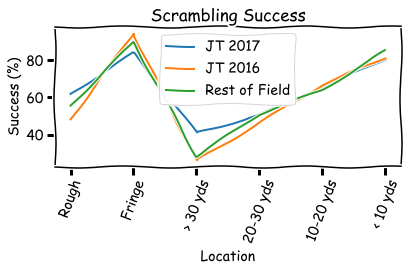

In [34]:
jt['Scrambling Rough Success'] = jt['Scrambling from the Rough(successes)'] / jt['Scrambling from the Rough(attempts)']
jt['Scrambling Fringe Success'] = jt['Scrambling from the Fringe(successes)'] / jt['Scrambling from the Fringe(attempts)']
jt['Scrambling >30 Success'] = jt['Scrambling >30 Yards(successes)'] / jt[' Scrambling >30 Yards(attempts)']
jt['Scrambling 20-30 Success'] = jt['Scrambling   20-30 Yards(successes)'] / jt[' Scrambling 20-30 Yards(attempts)']
jt['Scrambling 10-20 Success'] = jt['Scrambling 10-20 Yards(successes)'] / jt[' Scrambling 10-20 Yards(attempts)']
jt['Scrambling <10 Success'] = jt['Scrambling < 10 Yards(successes)'] / jt[' Scrambling < 10 Yards(attempts)']

field2017['Scrambling Rough Success'] = field2017['Scrambling from the Rough(successes)'] / field2017['Scrambling from the Rough(attempts)']
field2017['Scrambling Fringe Success'] = field2017['Scrambling from the Fringe(successes)'] / field2017['Scrambling from the Fringe(attempts)']
field2017['Scrambling >30 Success'] = field2017['Scrambling >30 Yards(successes)'] / field2017[' Scrambling >30 Yards(attempts)']
field2017['Scrambling 20-30 Success'] = field2017['Scrambling   20-30 Yards(successes)'] / field2017[' Scrambling 20-30 Yards(attempts)']
field2017['Scrambling 10-20 Success'] = field2017['Scrambling 10-20 Yards(successes)'] / field2017[' Scrambling 10-20 Yards(attempts)']
field2017['Scrambling <10 Success'] = field2017['Scrambling < 10 Yards(successes)'] / field2017[' Scrambling < 10 Yards(attempts)']

index = np.arange(6)
seriesJT2017 = (
    jt.loc[(jt['Tournament Year'] == 2017)]['Scrambling Rough Success'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['Scrambling Fringe Success'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['Scrambling >30 Success'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['Scrambling 20-30 Success'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['Scrambling 10-20 Success'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['Scrambling <10 Success'].mean() * 100.0
)

seriesJT2016 = (
    jt.loc[(jt['Tournament Year'] == 2016)]['Scrambling Rough Success'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['Scrambling Fringe Success'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['Scrambling >30 Success'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['Scrambling 20-30 Success'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['Scrambling 10-20 Success'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['Scrambling <10 Success'].mean() * 100.0
)

seriesField2017 = (
    field2017['Scrambling Rough Success'].mean() * 100.0,
    field2017['Scrambling Fringe Success'].mean() * 100.0,
    field2017['Scrambling >30 Success'].mean() * 100.0,
    field2017['Scrambling 20-30 Success'].mean() * 100.0,
    field2017['Scrambling 10-20 Success'].mean() * 100.0,
    field2017['Scrambling <10 Success'].mean() * 100.0
)

x = (0,1,2,3,4,5)

with plt.xkcd():
    plt.plot(x, seriesJT2017)
    plt.plot(x, seriesJT2016)
    plt.plot(x, seriesField2017)
    
    plt.ylabel('Success (%)')
    plt.xlabel('Location')
    plt.title('Scrambling Success')
    plt.legend(['JT 2017', 'JT 2016', 'Rest of Field'])
    plt.xticks(np.arange(6), ('Rough', 'Fringe', '> 30 yds', '20-30 yds', '10-20 yds', '< 10 yds'), rotation=70)
    plt.tight_layout()
    plt.savefig('scrambling-success.png')
    plt.show()

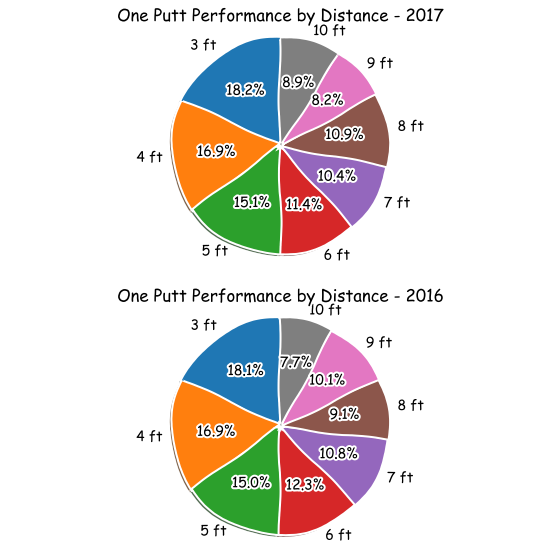

In [46]:
jt['3ft Accuracy'] = jt["Putting   3'(putts made)"] / jt["Putting   3'(attempts)"]
jt['4ft Accuracy'] = jt["Putting 4'(putts made)"] / jt["Putting   4'(attempts)"]
jt['5ft Accuracy'] = jt["Putting 5'(putts made)"] / jt["Putting 5'(attempts)"]
jt['6ft Accuracy'] = jt["Putting 6'(putts made)"] / jt["Putting 6'(attempts)"]
jt['7ft Accuracy'] = jt["Putting 7'(putts made)"] / jt["Putting 7'(attempts)"]
jt['8ft Accuracy'] = jt["Putting 8'(putts made)"] / jt["Putting 8'(attempts)"]
jt['9ft Accuracy'] = jt["Putting 9'(putts made)"] / jt["Putting   9'(attempts)"]
jt['10ft Accuracy'] = jt["Putting 10'(putts made)"] / jt["Putting 10'(attempts)"]

field2017['3ft Accuracy'] = field2017["Putting   3'(putts made)"] / field2017["Putting   3'(attempts)"]
field2017['4ft Accuracy'] = field2017["Putting 4'(putts made)"] / field2017["Putting   4'(attempts)"]
field2017['5ft Accuracy'] = field2017["Putting 5'(putts made)"] / field2017["Putting 5'(attempts)"]
field2017['6ft Accuracy'] = field2017["Putting 6'(putts made)"] / field2017["Putting 6'(attempts)"]
field2017['7ft Accuracy'] = field2017["Putting 7'(putts made)"] / field2017["Putting 7'(attempts)"]
field2017['8ft Accuracy'] = field2017["Putting 8'(putts made)"] / field2017["Putting 8'(attempts)"]
field2017['9ft Accuracy'] = field2017["Putting 9'(putts made)"] / field2017["Putting   9'(attempts)"]
field2017['10ft Accuracy'] = field2017["Putting 10'(putts made)"] / field2017["Putting 10'(attempts)"]

labels = ['3 ft', '4 ft', '5 ft', '6 ft', '7 ft', '8 ft', '9 ft', '10 ft']
data2017 = [
    jt.loc[(jt['Tournament Year'] == 2017)]['3ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['4ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['5ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['6ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['7ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['8ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['9ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['10ft Accuracy'].mean() * 100.0
]
data2016 = [
    jt.loc[(jt['Tournament Year'] == 2016)]['3ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['4ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['5ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['6ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['7ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['8ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['9ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['10ft Accuracy'].mean() * 100.0
]

with plt.xkcd():
    fig = plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    plt.pie(data2017, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title('One Putt Performance by Distance - 2017')
    
    plt.subplot(2,1,2)
    plt.pie(data2016, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title('One Putt Performance by Distance - 2016')
    
    plt.tight_layout()
    plt.savefig('one-putt-by-distance.png')
    plt.show()

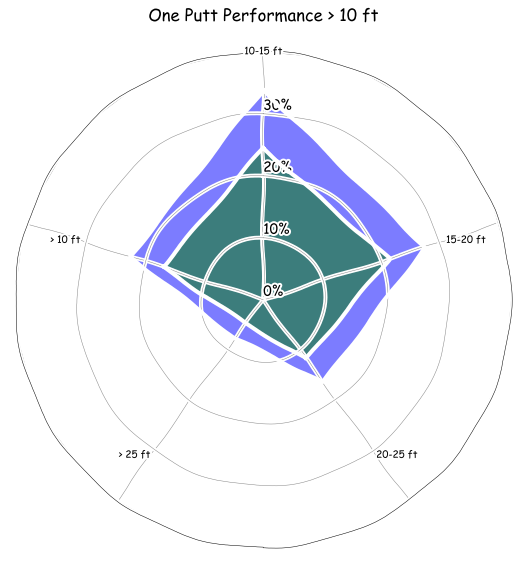

In [71]:
jt['Putts 10-15ft Accuracy'] = jt["Putting   10'-15'(putts made)"] / jt["Putting 10'-15'(attempts)"]
jt['Putts 15-20ft Accuracy'] = jt["Putting 15'-20'(putts made)"] / jt["Putting 15-20'(attempts)"]
jt['Putts 20-25ft Accuracy'] = jt["Putting 20'-25'(putts made)"] / jt["Putting 20'-25'(attempts)"]
jt['Putts >25ft Accuracy'] = jt["Putting   >25'(putts made)"] / jt["Putting >25'(attempts)"]
jt['Putts >10ft Accuracy'] = jt["Putting   > 10' (putts made)"] / jt["Putting   > 10' (attempts)"]

field2017['Putts 10-15ft Accuracy'] = field2017["Putting   10'-15'(putts made)"] / field2017["Putting 10'-15'(attempts)"]
field2017['Putts 15-20ft Accuracy'] = field2017["Putting 15'-20'(putts made)"] / field2017["Putting 15-20'(attempts)"]
field2017['Putts 20-25ft Accuracy'] = field2017["Putting 20'-25'(putts made)"] / field2017["Putting 20'-25'(attempts)"]
field2017['Putts >25ft Accuracy'] = field2017["Putting   >25'(putts made)"] / field2017["Putting >25'(attempts)"]
field2017['Putts >10ft Accuracy'] = field2017["Putting   > 10' (putts made)"] / field2017["Putting   > 10' (attempts)"]

labels = ['10-15 ft', '15-20 ft', '20-25 ft', '> 25 ft', '> 10 ft']

data2017 = [
    jt.loc[(jt['Tournament Year'] == 2017)]['Putts 10-15ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['Putts 15-20ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['Putts 20-25ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['Putts >25ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2017)]['Putts >10ft Accuracy'].mean() * 100.0
]
data2016 = [
    jt.loc[(jt['Tournament Year'] == 2016)]['Putts 10-15ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['Putts 15-20ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['Putts 20-25ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['Putts >25ft Accuracy'].mean() * 100.0,
    jt.loc[(jt['Tournament Year'] == 2016)]['Putts >10ft Accuracy'].mean() * 100.0
]

from math import pi

N = len(labels)
x = [n / float(N) * 2 * pi for n in range(N)]
data2017 += data2017[:1]
data2016 += data2016[:1]
x += x[:1]

with plt.xkcd():
    fig = plt.figure(figsize=(8,8))
    plt.rc('axes', linewidth=0.5)
    ax = plt.subplot(111, polar=True)
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    ax.set_rlabel_position(0)
    
    ax.xaxis.grid(True, color='#888888', linestyle='solid', linewidth=0.5)
    ax.yaxis.grid(True, color='#888888', linestyle='solid', linewidth=0.5)
    
    plt.xticks(x[:-1], [])
    plt.yticks([0, 10, 20, 30, 40], ['0%', '10%', '20%', '30%'])
    
    ax.plot(x, data2017, linewidth=0, linestyle='solid', zorder=3)
    ax.fill(x, data2017, 'b', alpha=0.3)
    
    ax.plot(x, data2016, linewidth=0, linestyle='solid', zorder=3)
    ax.fill(x, data2016, 'g', alpha=0.3)
    
    plt.ylim(0, 40)
    
    for i in range(N):
        angle_rad = i / float(N) * 2 * pi

        if angle_rad == 0:
            ha, distance_ax = "center", 10
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 1
        elif angle_rad == pi:
            ha, distance_ax = "center", 1
        else:
            ha, distance_ax = "right", 1

        ax.text(angle_rad, 30 + distance_ax, labels[i], size=10, horizontalalignment=ha, verticalalignment="center")


    plt.title('One Putt Performance > 10 ft')
    plt.tight_layout()
    plt.savefig('one-putts-by-distance-long.png')
    plt.show()

In [73]:
jt['TeeTimeHour'] = 0
jt['TeeTimeHour'] = jt['Tee Time'].str[0:2]
jt['TeeTimeHour'] = jt['TeeTimeHour'].astype(int)

field2017['TeeTimeHour'] = 0
field2017['TeeTimeHour'] = field2017['Tee Time'].str[0:2]
field2017['TeeTimeHour'] = field2017['TeeTimeHour'].astype(int)

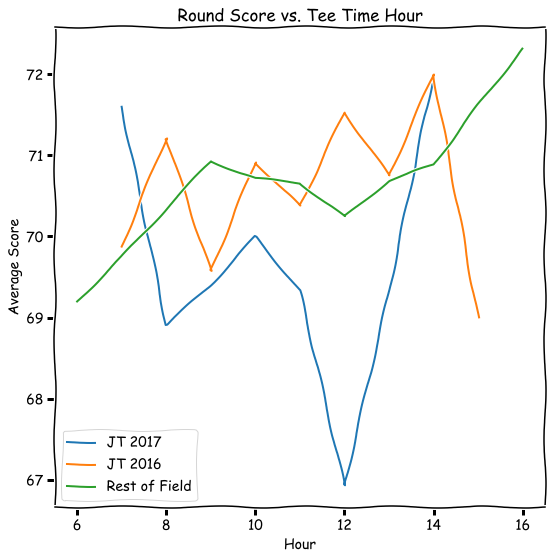

In [77]:
x = range(min(jt['TeeTimeHour'].min(), field2017['TeeTimeHour'].min()),
         max(jt['TeeTimeHour'].max(), field2017['TeeTimeHour'].max()))

seriesJT2017 = []
seriesJT2016 = []
seriesField2017 = []

for i in x:
    seriesJT2017.append(jt.loc[(jt['Tournament Year'] == 2017) & (jt['TeeTimeHour'] == i)]['Round Score'].mean())
    seriesJT2016.append(jt.loc[(jt['Tournament Year'] == 2016) & (jt['TeeTimeHour'] == i)]['Round Score'].mean())
    seriesField2017.append(field2017.loc[(field2017['TeeTimeHour'] == i)]['Round Score'].mean())

with plt.xkcd():
    fig = plt.figure(figsize=(8,8))
    plt.plot(x, seriesJT2017)
    plt.plot(x, seriesJT2016)
    plt.plot(x, seriesField2017)
    
    plt.ylabel('Average Score')
    plt.xlabel('Hour')
    plt.title('Round Score vs. Tee Time Hour')
    plt.legend(['JT 2017', 'JT 2016', 'Rest of Field'], loc='lower left')
    #plt.xticks(np.arange(len(x)), ('Rough', 'Fringe', '> 30 yds', '20-30 yds', '10-20 yds', '< 10 yds'), rotation=70)
    plt.tight_layout()
    plt.savefig('tee-time-scores.png')
    plt.show()